# Mini Project: Investigate Hotel Business using Data Visualization
----

## Latar Belakang

Analisis kinerja bisnis merupakan kunci penting bagi perusahaan untuk mencapai keberhasilan dalam bisnisnya. Perusahaan dapat melakukan analisis untuk mengidentifikasi permasalahan, kelemahan, dan kekuatan yang dimilikinya. Dalam bisnis perhotelan, penting untuk memahami perilaku pelanggan. Dengan memahami perilaku pelanggan, perusahaan dapat mengetahui faktor apa saja yang mempengaruhi pelanggan dalam melakukan pemesanan hotel. Selain itu, perusahaan juga dapat mengidentifikasi produk atau layanan apa yang kurang laku di pasar. Hal ini dilakukan untuk menyesuaikan strategi bisnis yang tepat guna sehingga perusahaan dapat meningkatkan pengalaman pelanggan dan dapat mencapai tujuan bisnis jangka panjang.

**Business Questions|**
<br>

* Jenis hotel apa yang paling sering dikunjungi oleh pelanggan?
* Apakah durasi menginap mempengaruhi tingkat pembatalan pemesanan hotel?
* Apakah jarak waktu antara pemesanan hotel dan hari kedatangan tamu mempengaruhi tingkat pembatalan pemesanan hotel?

**Objektif**<br>

Membuat visualisasi berbasis data sebagai insight bagi bisnis hotel

## Load Dataset
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.2
pandas version :  2.0.3
seaborn version :  0.12.2


In [2]:
df = pd.read_csv('hotel_bookings_data.csv')
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
55696,City Hotel,1,291,2018,October,34,19,0,2,2,...,0,Non Refund,39.0,NaN,0,Personal,115.00,0,0,Canceled
24360,Resort Hotel,0,114,2018,July,20,12,2,5,2,...,1,No Deposit,243.0,NaN,0,Contract,73.75,0,0,Check-Out
78799,City Hotel,0,14,2017,December,42,15,0,2,1,...,0,No Deposit,99.0,NaN,0,Family,100.00,0,0,Check-Out
108876,City Hotel,0,81,2019,May,13,31,1,2,2,...,2,No Deposit,9.0,NaN,0,Personal,142.20,0,0,Check-Out
32078,Resort Hotel,0,11,2019,March,2,12,1,3,2,...,0,No Deposit,240.0,NaN,0,Personal,58.00,0,0,Check-Out


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

* Dataset berjumlah **119390** baris dan **29** fitur
* Tipe data dalam dataset: **float64**, **int64**, dan **object**


### Check value dari tiap fitur

In [4]:
for col in df.columns:
    print("{} memiliki {} unique values: {}".format(col, df[col].nunique(), df[col].dtypes))
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64' or df[col].dtypes == 'object':
        print("{} values: {}".format(col,df[col].unique()))
        print('-' * 100)

hotel memiliki 2 unique values: object
hotel values: ['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------
is_canceled memiliki 2 unique values: int64
is_canceled values: [0 1]
----------------------------------------------------------------------------------------------------
lead_time memiliki 479 unique values: int64
lead_time values: [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124

## Data Cleansing

### 1. Checking null values

In [5]:
jumlah_null = df.isnull().sum()
rasio_null = jumlah_null / len(df) * 100
df_rasio_null = pd.DataFrame({'Jumlah Null': jumlah_null,
                             'Rasio Null %': rasio_null})

print(df_rasio_null)

                                Jumlah Null  Rasio Null %
hotel                                     0      0.000000
is_canceled                               0      0.000000
lead_time                                 0      0.000000
arrival_date_year                         0      0.000000
arrival_date_month                        0      0.000000
arrival_date_week_number                  0      0.000000
arrival_date_day_of_month                 0      0.000000
stays_in_weekend_nights                   0      0.000000
stays_in_weekdays_nights                  0      0.000000
adults                                    0      0.000000
children                                  4      0.003350
babies                                    0      0.000000
meal                                      0      0.000000
city                                    488      0.408744
market_segment                            0      0.000000
distribution_channel                      0      0.000000
is_repeated_gu

**Fitur yang memiliki null value:**
* children
* city
* agent
* company

### 2. Mengatasi null values

In [6]:
# mengisi fitur dengan nilai 0

df['children'] = df['children'].fillna(0)
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)


# fitur city diisni dengan 'unknown'
df['city'] = df['city'].fillna('unknown')


In [7]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### 3. Feature Engineering

In [8]:
# ubah value yang tidak sesuai pada fitur meal
df['meal'] = df['meal'].replace({'Breakfast': 'with meal',
                                 'Dinner': 'with meal',
                                 'No Meal': 'no meal',
                                 'Undefined': 'no meal',
                                 'Full Board': 'with meal'})

In [9]:
df['meal'].value_counts()

meal
with meal    107571
no meal       11819
Name: count, dtype: int64

## Analisis Jumlah Pemesanan Hotel per Bulan Berdasarkan Tipe Hotel
---

In [10]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out


In [11]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [12]:
hotel_counts = df['hotel'].value_counts()
hotel_counts

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

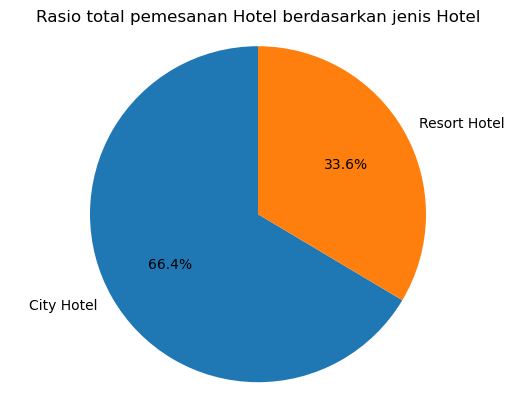

In [13]:
labels = hotel_counts.index
sizes = hotel_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Rasio total pemesanan Hotel berdasarkan jenis Hotel')
plt.show()

* Kategori "City Hotel" lebih banyak di book oleh pelanggan sebesar 66,4% dibandingkan "Resort Hotel".
* Perbedaan nilai distribusi tersebut mungkin disebabkan oleh tujuan pelanggan dalam memesan Hotel. City Hotel biasanya terletak di area strategis perkotaan, dan mudah diakses. Sedangkan Resort Hotel terletak di area pantai, pegunungan, dll dan biasanya dituju oleh pelanggan yang berlibur dan bersantai.

### Rata-rata Total Booking

In [14]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
892,Resort Hotel,1,61,2017,October,32,3,2,5,2,...,0,No Deposit,240.0,0.0,0,Personal,153.0,0,0,Canceled
105270,City Hotel,0,4,2019,April,5,3,0,1,1,...,1,No Deposit,0.0,396.0,0,Family,80.0,0,0,Check-Out
7342,Resort Hotel,1,199,2018,October,32,4,2,3,2,...,0,No Deposit,240.0,0.0,0,Personal,240.0,0,1,Canceled
43450,City Hotel,0,74,2017,November,38,18,0,2,2,...,0,No Deposit,6.0,0.0,0,Family,109.0,0,0,Check-Out
60356,City Hotel,1,277,2018,January,46,7,1,2,2,...,0,Non Refund,0.0,0.0,0,Personal,100.0,0,0,Canceled


In [15]:
monthly_book = df.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()

# Rename the columns for clarity
monthly_book.columns = ['hotel', 'arrival_date_month', 'nunique_year', 'total_bookings']

# Display the result
monthly_book

,hotel,arrival_date_month,nunique_year,total_bookings
0,City Hotel,April,2,4965
1,City Hotel,August,2,7894
2,City Hotel,December,2,7605
3,City Hotel,February,2,4132
4,City Hotel,January,2,4357
5,City Hotel,July,2,8232
6,City Hotel,June,2,7480
7,City Hotel,March,2,3736
8,City Hotel,May,2,6458
9,City Hotel,November,2,7400


* Pada bulan September dan Oktober didapatkan nilai nunique_year = 3, artinya bulan tersebut tercatat pada 3 tahun yang berbeda yaitu 2017, 2018, dan 2019. 

### Normalisasi

In [16]:
monthly_book['average'] = round(monthly_book['total_bookings']/monthly_book['nunique_year'])
monthly_book

,hotel,arrival_date_month,nunique_year,total_bookings,average
0,City Hotel,April,2,4965,2482.0
1,City Hotel,August,2,7894,3947.0
2,City Hotel,December,2,7605,3802.0
3,City Hotel,February,2,4132,2066.0
4,City Hotel,January,2,4357,2178.0
5,City Hotel,July,2,8232,4116.0
6,City Hotel,June,2,7480,3740.0
7,City Hotel,March,2,3736,1868.0
8,City Hotel,May,2,6458,3229.0
9,City Hotel,November,2,7400,3700.0


### Sorted Month Grouping

In [17]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] # Mengurutkan data berdasarkan bulan
monthly_book['sorted_month'] = monthly_book['arrival_date_month'].str[:3] #mengambil 3 huruf terdepan dari "arrival_date_month"  
monthly_book['sorted_month'] = pd.Categorical(monthly_book['sorted_month'], categories=months)
monthly_book.sort_values('sorted_month')

,hotel,arrival_date_month,nunique_year,total_bookings,average,sorted_month
4,City Hotel,January,2,4357,2178.0,Jan
16,Resort Hotel,January,2,2437,1218.0,Jan
3,City Hotel,February,2,4132,2066.0,Feb
15,Resort Hotel,February,2,2648,1324.0,Feb
7,City Hotel,March,2,3736,1868.0,Mar
19,Resort Hotel,March,2,2193,1096.0,Mar
0,City Hotel,April,2,4965,2482.0,Apr
12,Resort Hotel,April,2,3103,1552.0,Apr
20,Resort Hotel,May,2,3336,1668.0,May
8,City Hotel,May,2,6458,3229.0,May


### Visualisasi

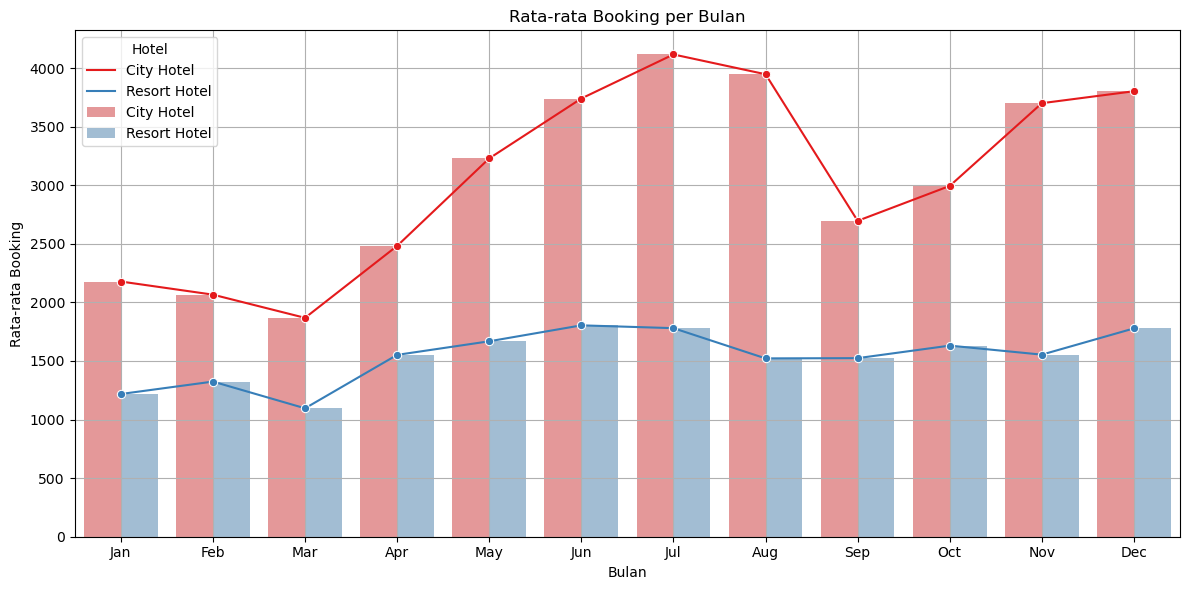

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data=monthly_book, x='sorted_month', y='average', hue='hotel', marker='o', palette='Set1', ax=ax)

sns.barplot(data=monthly_book, x='sorted_month', y='average', hue='hotel', palette='Set1', ax=ax, alpha=0.5)


plt.title('Rata-rata Booking per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Booking')
plt.grid(True)
plt.legend(title='Hotel')
plt.tight_layout()
plt.show()

* Tingkat pemesanan kedua tipe Hotel pada bulan Maret adalah yang paling rendah karena belum memasuki musim liburan.
* Berdasarkan gambar plot, peningkatan jumlah pemesanan Hotel mengalami penigkatan pada dua periode yaitu bulan Mei - Juli kemudian bulan Oktober - Desember. Peningkatan tersebut terjadi karena periode waktu tersebut telah memasuki musim liburan, untuk musim liburan pertama dari Mei - Juli yaitu libur musim panas, sedangkan musim liburan kedua adalah natal dan tahun baru.

## Analisa Pengaruh Durasi Menginap terhadap tingkat Pembatalan Pemesanan Hotel
---

### Total Hotel Booking yang Batal

In [19]:
canceled_bookings = df[df['is_canceled'] == 1]
grouped_hotel_canceled = canceled_bookings.groupby('hotel').size().reset_index()
grouped_hotel_canceled.columns= ['hotel','total_canceled']
grouped_hotel_canceled

,hotel,total_canceled
0,City Hotel,33102
1,Resort Hotel,11122


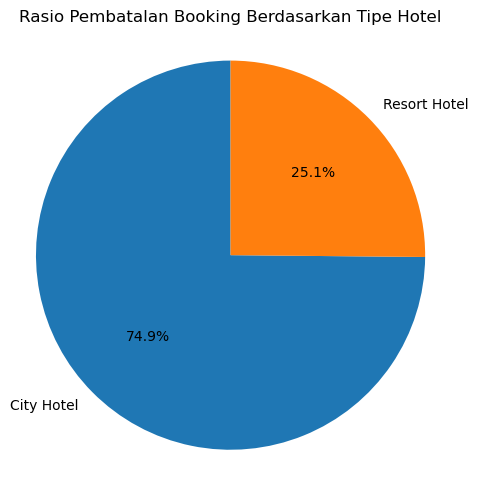

In [20]:
labels = grouped_hotel_canceled['hotel']
sizes = grouped_hotel_canceled['total_canceled']

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Rasio Pembatalan Booking Berdasarkan Tipe Hotel')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

* Pembatalan hotel dengan jenis City Hotel adalah yang paling banyak terjadi pembatalan pemesanan dibandingkan dengan Resort Hotel. Hal ini mungkin disebabkan karena City Hotel terletak di area perkotaan dimana banyak kegiatan dan aktifitas yang sibuk terjadi, oleh karena itu pelangganpun dapat dipengaruhi oleh faktor kesibukan tersebut.


### Total Durasi Menginap

In [21]:
df['total_stay_duration'] = df['stays_in_weekdays_nights'] + df['stays_in_weekend_nights']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_stay_duration
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2


In [22]:
maxx = df['total_stay_duration'].max()
minn = df['total_stay_duration'].min()

print('max duration =',maxx)
print('min duration =',minn)

max duration = 69
min duration = 0


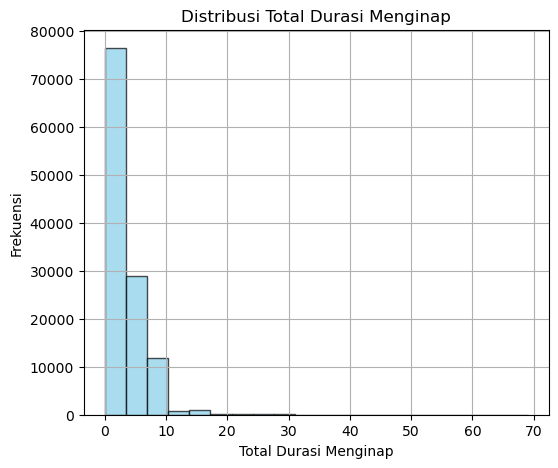

In [23]:
plt.figure(figsize=(6, 5))
plt.hist(df['total_stay_duration'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Total Durasi Menginap')
plt.ylabel('Frekuensi')
plt.title('Distribusi Total Durasi Menginap')
plt.grid(True)
plt.show()

### Feature Engineering

In [24]:
# Melakukan labelling group kolom baru dari `total_stay_duration`
df['total_weeks_stayed'] = np.where(df['total_stay_duration'] <= 7, '<1 week',
                                     np.where(df['total_stay_duration'] <= 14, '1-2 weeks',
                                              np.where(df['total_stay_duration'] <= 21, '2-3 weeks',
                                                       np.where(df['total_stay_duration'] <= 28, '3-4 weeks', 'more than 4 weeks'))))

In [25]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_stay_duration,total_weeks_stayed
6723,Resort Hotel,1,0,2018,August,27,27,1,0,2,...,0.0,0.0,0,Personal,8.00,0,0,Canceled,1,<1 week
53177,City Hotel,1,245,2018,August,25,17,0,2,2,...,12.0,0.0,0,Personal,75.00,0,0,Canceled,2,<1 week
117429,City Hotel,0,99,2019,September,31,31,1,3,3,...,9.0,0.0,0,Personal,195.00,0,1,Check-Out,4,<1 week
107,Resort Hotel,1,102,2017,September,27,4,2,5,2,...,240.0,0.0,0,Personal,110.70,0,1,Canceled,7,<1 week
42327,City Hotel,0,82,2017,November,36,5,0,1,2,...,9.0,0.0,0,Personal,98.25,1,2,Check-Out,1,<1 week


### Cancelation Rate dari Durasi Menginap 

In [26]:
cancelled_bookings = df[df['is_canceled'] == 1]
grouped_cancelled = cancelled_bookings.groupby(['hotel', 'total_weeks_stayed']).size().reset_index(name='cancelled_count')

total_bookings = df.groupby(['hotel', 'total_weeks_stayed']).size().reset_index(name='total_count')

# Gabungkan kedua DataFrame di atas
merged_df = pd.merge(total_bookings, grouped_cancelled, on=['hotel', 'total_weeks_stayed'], how='left')

# Hitung tingkat pembatalan
merged_df['cancelation_rate'] = merged_df['cancelled_count'] / merged_df['total_count']

# Tampilkan DataFrame hasil
merged_df

,hotel,total_weeks_stayed,total_count,cancelled_count,cancelation_rate
0,City Hotel,1-2 weeks,1086,558,0.513812
1,City Hotel,2-3 weeks,108,77,0.712963
2,City Hotel,3-4 weeks,28,21,0.750000
3,City Hotel,<1 week,78082,32426,0.415281
4,City Hotel,more than 4 weeks,26,20,0.769231
5,Resort Hotel,1-2 weeks,3732,1078,0.288853
6,Resort Hotel,2-3 weeks,169,79,0.467456
7,Resort Hotel,3-4 weeks,83,39,0.469880
8,Resort Hotel,<1 week,36051,9919,0.275138
9,Resort Hotel,more than 4 weeks,25,7,0.280000


### Visualisasi

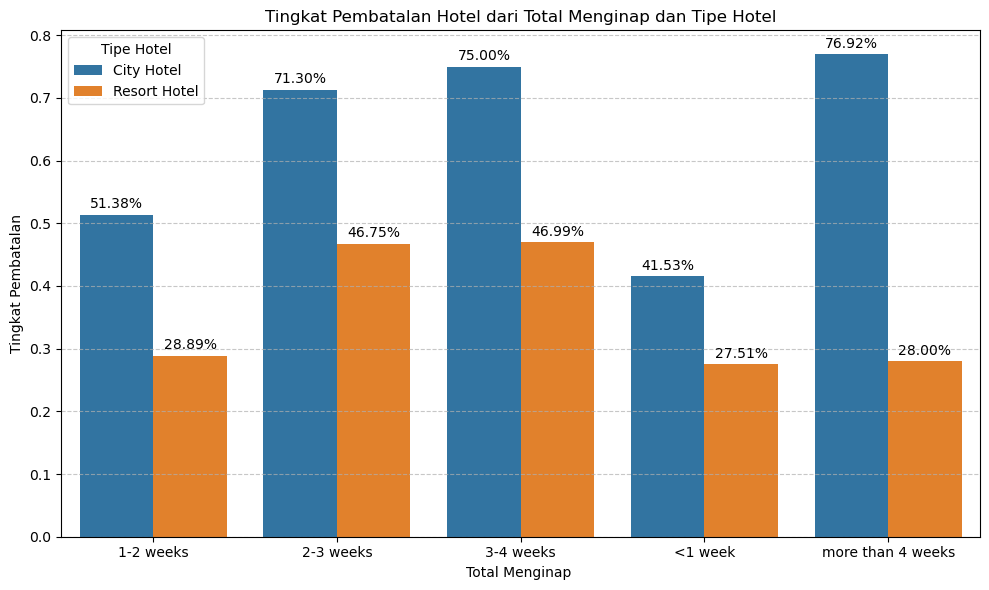

In [27]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=merged_df, x='total_weeks_stayed', y='cancelation_rate', hue='hotel')

# Add percentage labels above each bar
for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2, height + 0.01, '{:.2%}'.format(height), ha="center")

# Add title and labels
plt.title('Tingkat Pembatalan Hotel dari Total Menginap dan Tipe Hotel')
plt.xlabel('Total Menginap ')
plt.ylabel('Tingkat Pembatalan')
plt.legend(title='Tipe Hotel')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* Berdasarkan hasil visualisasi, persentase tingkat pembatalan pemesanan ketegori City Hotel semakin meningkat seiring dengan lama durasi menginapnya. Sedangkan untuk kategori Resort Hotel tingkat pembatalan pemesanan memiliki persentase yang tinggi pada durasi menginap selama 2-3 minggu dan 3-4 minggu.

* Dapat diinterpretasikan bahwa korelasi antara lamanya durasi menginap memiliki pengaruh terhadap tingkat pembatalan pemesanan untuk kategori City Hotel.

## Analisis Pengaruh Lead Time terhadap Tingkat Pembatalan Pemesanan Hotel
----

In [28]:
nunique = df['lead_time'].nunique()
minn = df['lead_time'].min()
maxx= df['lead_time'].max()

print(nunique)
print(minn)
print(maxx)

479
0
737


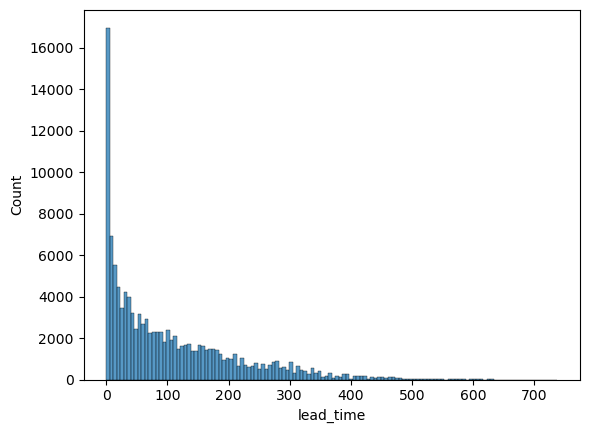

In [29]:
sns.histplot(df['lead_time'])
plt.show()

In [30]:
# melaukan grouping label untuk waktu lead time
df['lead_time_group'] = np.where((df['lead_time']) <= 30, '1 bulan',
                        np.where((df['lead_time']) <= 60, '2 bulan',
                        np.where((df['lead_time']) <= 90, '3 bulan', 
                        np.where((df['lead_time']) <= 120, '4 bulan',
                        np.where((df['lead_time']) <= 150, '5 bulan',
                        np.where((df['lead_time']) <= 180, '6 bulan',
                        np.where((df['lead_time']) <= 210, '7 bulan', 
                        np.where((df['lead_time']) <= 240, '8 bulan',
                        np.where((df['lead_time']) <= 270, '9 bulan',
                        np.where((df['lead_time']) <= 300, '10 bulan', 
                        np.where((df['lead_time']) <= 330, '11 bulan',
                        np.where((df['lead_time']) <= 360, '12 bulan', 'lebih dari 1 tahun'))))))))))))

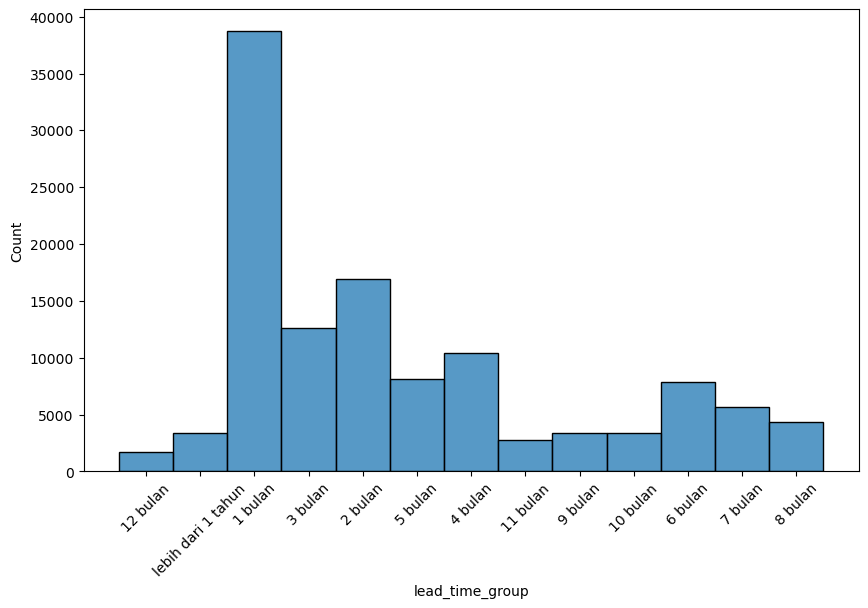

In [31]:
plt.figure(figsize = (10, 6))
sns.histplot(df['lead_time_group'])
plt.xticks(rotation = 45)
plt.show()

## Tingkat Pembatalan Berdasarkan Lead Time

In [32]:
cancelled_bookings = df[df['is_canceled'] == 1]
lead_cancelled = cancelled_bookings.groupby(['hotel', 'lead_time_group']).agg(cancelled_count=('arrival_date_year', 'count')).reset_index()

total_bookings = df.groupby(['hotel', 'lead_time_group']).agg(total_count=('arrival_date_year', 'count')).reset_index()

# Gabungkan kedua DataFrame di atas
merged_df1 = pd.merge(total_bookings, lead_cancelled, on=['hotel', 'lead_time_group'], how='left')

# Hitung tingkat pembatalan
merged_df1['cancelation_rate'] = merged_df1['cancelled_count'] / merged_df1['total_count']

# Tampilkan DataFrame hasil
merged_df1

,hotel,lead_time_group,total_count,cancelled_count,cancelation_rate
0,City Hotel,1 bulan,23362,5199,0.222541
1,City Hotel,10 bulan,2519,1859,0.737991
2,City Hotel,11 bulan,2118,1604,0.757318
3,City Hotel,12 bulan,1223,1004,0.820932
4,City Hotel,2 bulan,11889,4608,0.387585
5,City Hotel,3 bulan,8908,3692,0.414459
6,City Hotel,4 bulan,7447,3486,0.468108
7,City Hotel,5 bulan,5613,2543,0.453055
8,City Hotel,6 bulan,5163,2717,0.526244
9,City Hotel,7 bulan,3594,1793,0.498887


In [33]:
# sorting
lead_time_order = ['1 bulan', '2 bulan', '3 bulan', '4 bulan', '5 bulan', '6 bulan', 
                   '7 bulan', '8 bulan', '9 bulan', '10 bulan', '11 bulan', '12 bulan', 
                   'lebih dari 1 tahun']

# Convert 'lead_time_group' to ordered categorical datatype
merged_df1['lead_time_group'] = pd.Categorical(merged_df1['lead_time_group'], categories=lead_time_order, ordered=True)

# Sort the DataFrame based on 'lead_time_group'
merged_df1 = merged_df1.sort_values(by='lead_time_group')

# Display the sorted DataFrame
merged_df1

,hotel,lead_time_group,total_count,cancelled_count,cancelation_rate
0,City Hotel,1 bulan,23362,5199,0.222541
13,Resort Hotel,1 bulan,15344,1986,0.129432
4,City Hotel,2 bulan,11889,4608,0.387585
17,Resort Hotel,2 bulan,5081,1566,0.308207
5,City Hotel,3 bulan,8908,3692,0.414459
18,Resort Hotel,3 bulan,3675,1275,0.346939
19,Resort Hotel,4 bulan,2987,1159,0.388015
6,City Hotel,4 bulan,7447,3486,0.468108
20,Resort Hotel,5 bulan,2531,1032,0.407744
7,City Hotel,5 bulan,5613,2543,0.453055


### Visualisasi

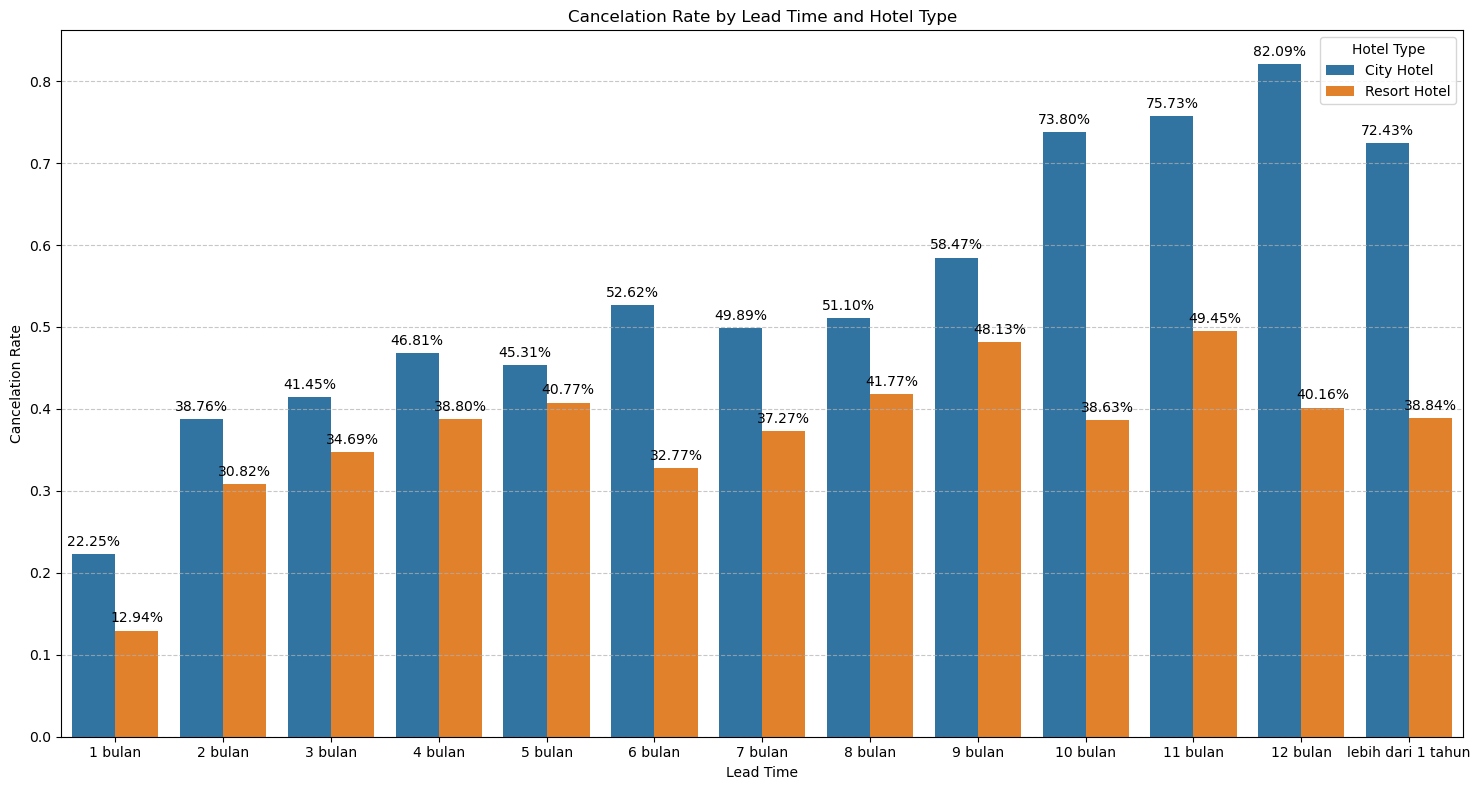

In [34]:
plt.figure(figsize=(15, 8))
barplot = sns.barplot(data=merged_df1, x='lead_time_group', y='cancelation_rate', hue='hotel')

# Add percentage labels above each bar
for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2, height + 0.01, '{:.2%}'.format(height), ha="center")

# Add title and labels
plt.title('Cancelation Rate by Lead Time and Hotel Type')
plt.xlabel('Lead Time')
plt.ylabel('Cancelation Rate')
plt.legend(title='Hotel Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* Berdasarkan hasil visualisasi, persentase tingkat pembatalan pemesanan ketegori City Hotel secara umum meningkat seiring dengan lama durasi lead time. Sedangkan untuk kategori Resort Hotel tingkat pembatalan pemesanan memiliki persentase yang tinggi pada durasi lead time selama 9 bulan dan 11 bulan, namun jika dilihat secara keseluruhan grafik Resert Hotel juga dapat dikatakan memiliki persentase tingkat pembatalan yang semakin meningkat.

* Dapat diinterpretasikan bahwa korelasi antara lamanya durasi lead time memiliki pengaruh terhadap tingkat pembatalan pemesanan untuk lebih spesifiknya untuk kategori City Hotel.

## Kesimpulan

**Business Questions**

* Jenis hotel apa yang paling sering dikunjungi oleh pelanggan?<br>

Kategori "City Hotel" lebih banyak di book oleh pelanggan sebesar 66,4% dibandingkan "Resort Hotel".
Peningkatan jumlah pemesanan City Hotel mengalami penigkatan pada dua periode yaitu bulan Mei - Juli kemudian bulan Oktober - Desember. Peningkatan tersebut terjadi karena periode waktu tersebut telah memasuki musim liburan.

* Apakah durasi menginap mempengaruhi tingkat pembatalan pemesanan hotel?<br>

Korelasi antara lamanya durasi menginap dari seluruh rentang waktu 1 minggu sampai lebih dari 4 minggu memiliki pengaruh terhadap tingkat pembatalan pemesanan untuk kategori City Hotel. Namun, untuk kategori Resort Hotel memiliki persentase pembatalan paling tinggi pada durasi menginap 2-4 minggu. 

* Apakah jarak waktu antara pemesanan hotel dan hari kedatangan tamu (lead time) mempengaruhi tingkat pembatalan pemesanan hotel?<br>

Korelasi antara lamanya durasi lead time memiliki pengaruh terhadap tingkat pembatalan pemesanan untuk lebih spesifiknya untuk kategori City Hotel. Sedangkan untuk kategori Resort Hotel tingkat pembatalan pemesanan memiliki persentase yang tinggi pada durasi lead time selama 9 bulan dan 11 bulan, namun jika dilihat secara keseluruhan grafik Resert Hotel juga dapat dikatakan memiliki persentase tingkat pembatalan yang semakin meningkat.

## Rekomendasi

* Memberikan promosi terhadap City Hotel karena lebih sering dipesan oleh pelanggan, dan promosi dapat difokuskan pada musim liburan dimana jumlah pemesanan tinggi seperti Mei-Juli dan Oktober-Desember.
* Pihak Hotel dapat mempertimbangkan strategi untuk mengurangi tingkat lead time karena berpengaruh terhadap tingkat pembatalan pemesanan hotel, seperti memberikan promosi atau insentif bagi pelanggan yang memesan jauh hari.